In [1]:
import pandas as pd
import numpy as np


# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For scaling the data
from sklearn.preprocessing import scale

# To perform K-means clustering
from sklearn.cluster import KMeans, AffinityPropagation

# To perform PCA
from sklearn.decomposition import PCA

#To perform hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
food_data = pd.read_csv("food.csv")

In [3]:
food_data

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,BUTTER,"BUTTER,WITH SALT",1001,0,2.11,158,0,0.06,215,19,...,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",1002,0,2.11,158,0,0.06,219,19,...,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",1003,0,0.00,193,0,0.00,256,22,...,5,2,0.01,3069,840,0.01,0.001,0.0,2.80,8.6
3,CHEESE,"CHEESE,BLUE",1004,0,5.11,74,0,2.34,75,15,...,256,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4
4,CHEESE,"CHEESE,BRICK",1005,0,3.18,76,0,2.79,94,15,...,136,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7408,FROG LEGS,"FROG LEGS,RAW",80200,0,1.40,0,0,0.00,50,65,...,285,58,1.00,50,15,0.40,0.120,0.0,1.00,0.1
7409,MACKEREL,"MACKEREL,SALTED",83110,0,13.40,0,0,0.00,95,95,...,520,4450,1.10,157,47,12.00,0.410,0.0,2.38,7.8
7410,SCALLOP,"SCALLOP,(BAY&SEA),CKD,STMD",90240,0,3.06,0,0,0.00,53,81,...,476,265,3.00,100,30,1.30,0.100,0.0,1.50,0.2
7411,SNAIL,"SNAIL,RAW",90560,0,1.30,0,0,2.00,50,65,...,382,70,1.00,100,30,0.50,0.130,0.0,5.00,0.1


In [4]:
food_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7413 entries, 0 to 7412
Data columns (total 48 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Category                                                 7413 non-null   object 
 1   Description                                              7413 non-null   object 
 2   Nutrient Data Bank Number                                7413 non-null   int64  
 3   Data.Alpha Carotene                                      7413 non-null   int64  
 4   Data.Ash                                                 7413 non-null   float64
 5   Data.Beta Carotene                                       7413 non-null   int64  
 6   Data.Beta Cryptoxanthin                                  7413 non-null   int64  
 7   Data.Carbohydrate                                        7413 non-null   float64
 8   Data.Cholesterol            

In [6]:
#Takes out the duplicates in the dataset to reduce number of data so that hierarchy clustering can work better
#Mean for each variable is attained for each category
food_data1=food_data.groupby(['Category'],as_index=False).mean()

In [7]:
food_data1

,Category,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,ABALONE,15155.500000,0.0,1.670000,0.000000,0.0,8.530000,89.500000,32.500000,0.000000,...,267.000000,446.000000,0.885000,6.000000,2.000000,0.710000,0.150000,1.900000,2.000000,11.500000
1,ABIYUCH,9427.000000,0.0,0.900000,60.000000,0.0,17.600000,0.000000,0.000000,5.300000,...,304.000000,20.000000,0.310000,100.000000,5.000000,0.000000,0.000000,54.100000,0.000000,0.000000
2,ACEROLA,9001.000000,0.0,0.200000,0.000000,0.0,7.690000,0.000000,0.000000,1.100000,...,146.000000,7.000000,0.100000,767.000000,38.000000,0.000000,0.009000,1677.600000,0.000000,0.000000
3,ACEROLA JUICE,9002.000000,0.0,0.200000,305.000000,0.0,4.800000,0.000000,0.000000,0.300000,...,97.000000,3.000000,0.100000,509.000000,25.000000,0.000000,0.004000,1600.000000,0.180000,1.400000
4,ACORN FLOUR,12060.000000,0.0,1.690000,0.000000,0.0,54.650000,0.000000,0.000000,0.000000,...,712.000000,0.000000,0.640000,51.000000,3.000000,0.000000,0.688000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,YARDLONG BEAN,11432.666667,0.0,0.686667,0.000000,0.0,8.900000,0.000000,0.000000,0.000000,...,273.333333,82.666667,0.363333,588.333333,29.666667,0.000000,0.024000,17.066667,0.000000,0.000000
1179,YARDLONG BNS,16233.666667,0.0,2.256667,0.000000,0.0,34.696667,0.000000,0.000000,6.200000,...,595.666667,87.666667,1.886667,22.666667,1.333333,0.000000,0.187000,0.800000,0.000000,0.000000
1180,YAUTIA (TANNIER),11991.000000,0.0,1.450000,5.000000,0.0,23.630000,0.000000,0.000000,1.500000,...,598.000000,21.000000,0.500000,8.000000,0.000000,0.000000,0.237000,5.200000,0.000000,0.000000
1181,YELLOWTAIL,15180.000000,0.0,1.245000,0.000000,0.0,0.000000,63.000000,0.000000,0.000000,...,479.000000,44.500000,0.595000,99.500000,30.000000,1.275000,0.172500,2.850000,0.000000,0.050000


In [8]:
## First let us see if we can explain the dataset using fewer variables
food_data2 = food_data1[['Data.Carbohydrate','Data.Cholesterol','Data.Kilocalories','Data.Protein',
                         'Data.Fat.Total Lipid','Data.Vitamins.Vitamin A - IU']]

food_data2

,Data.Carbohydrate,Data.Cholesterol,Data.Kilocalories,Data.Protein,Data.Fat.Total Lipid,Data.Vitamins.Vitamin A - IU
0,8.530000,89.500000,147.000000,18.365000,3.770000,6.000000
1,17.600000,0.000000,69.000000,1.500000,0.100000,100.000000
2,7.690000,0.000000,32.000000,0.400000,0.300000,767.000000
3,4.800000,0.000000,23.000000,0.400000,0.300000,509.000000
4,54.650000,0.000000,501.000000,7.490000,30.170000,51.000000
...,...,...,...,...,...,...
1178,8.900000,0.000000,47.000000,2.620000,0.200000,588.333333
1179,34.696667,0.000000,194.333333,13.636667,0.736667,22.666667
1180,23.630000,0.000000,98.000000,1.460000,0.400000,8.000000
1181,0.000000,63.000000,166.500000,26.405000,5.980000,99.500000


In [9]:
#Normalizes each row so that dendogram can be plotted
from sklearn.preprocessing import normalize
food_scaled = normalize(food_data2)
food_scaled = pd.DataFrame(food_scaled, columns=food_data2.columns)
food_scaled

,Data.Carbohydrate,Data.Cholesterol,Data.Kilocalories,Data.Protein,Data.Fat.Total Lipid,Data.Vitamins.Vitamin A - IU
0,0.049183,0.516045,0.847583,0.105890,0.021737,0.034595
1,0.143355,0.000000,0.562016,0.012218,0.000815,0.814516
2,0.010017,0.000000,0.041683,0.000521,0.000391,0.999080
3,0.009420,0.000000,0.045139,0.000785,0.000589,0.998936
4,0.107685,0.000000,0.987195,0.014759,0.059448,0.100493
...,...,...,...,...,...,...
1178,0.015078,0.000000,0.079623,0.004439,0.000339,0.996701
1179,0.174204,0.000000,0.975705,0.068467,0.003699,0.113804
1180,0.233644,0.000000,0.968984,0.014436,0.003955,0.079101
1181,0.000000,0.306228,0.809317,0.128348,0.029067,0.483646


We normalize each row of data so that they can be fitted onto the dendogram

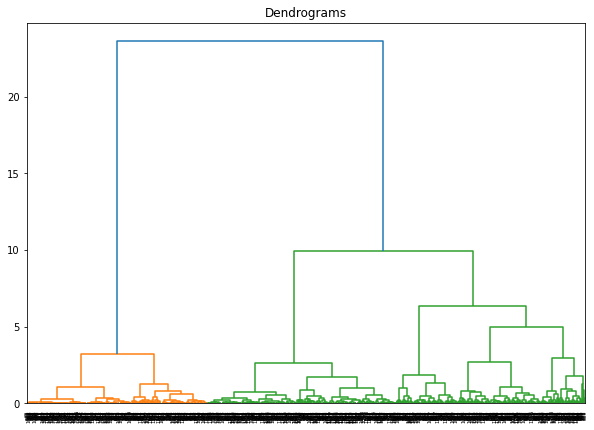

In [10]:
#Plotting out the dendogram
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(food_scaled, method='ward'))

To determine how many clusters we need, we have to draw a horizontal line that passes through longest distance without a horizontal line. In this case, it would be y=3.3.

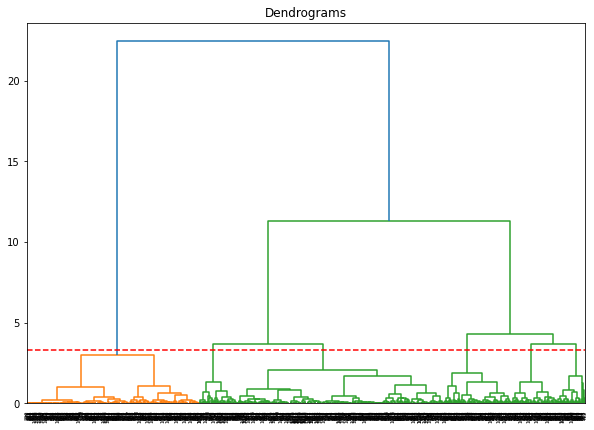

In [100]:
#Drawing the line to determine the number of clusters
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(food_scaled, method='ward'))
plt.axhline(y=3.3, color='r', linestyle='--')

Hence we need 7 clusters.

In [11]:
#Clustering is done and a new row called "Cluster" is added to the food_data so that we can observe the results
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
clusterNo = cluster.fit_predict(food_scaled)
food_data1['Cluster']=clusterNo
food_data1

,Category,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,Cluster
0,ABALONE,15155.500000,0.0,1.670000,0.000000,0.0,8.530000,89.500000,32.500000,0.000000,...,446.000000,0.885000,6.000000,2.000000,0.710000,0.150000,1.900000,2.000000,11.500000,0
1,ABIYUCH,9427.000000,0.0,0.900000,60.000000,0.0,17.600000,0.000000,0.000000,5.300000,...,20.000000,0.310000,100.000000,5.000000,0.000000,0.000000,54.100000,0.000000,0.000000,3
2,ACEROLA,9001.000000,0.0,0.200000,0.000000,0.0,7.690000,0.000000,0.000000,1.100000,...,7.000000,0.100000,767.000000,38.000000,0.000000,0.009000,1677.600000,0.000000,0.000000,5
3,ACEROLA JUICE,9002.000000,0.0,0.200000,305.000000,0.0,4.800000,0.000000,0.000000,0.300000,...,3.000000,0.100000,509.000000,25.000000,0.000000,0.004000,1600.000000,0.180000,1.400000,5
4,ACORN FLOUR,12060.000000,0.0,1.690000,0.000000,0.0,54.650000,0.000000,0.000000,0.000000,...,0.000000,0.640000,51.000000,3.000000,0.000000,0.688000,0.000000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,YARDLONG BEAN,11432.666667,0.0,0.686667,0.000000,0.0,8.900000,0.000000,0.000000,0.000000,...,82.666667,0.363333,588.333333,29.666667,0.000000,0.024000,17.066667,0.000000,0.000000,5
1179,YARDLONG BNS,16233.666667,0.0,2.256667,0.000000,0.0,34.696667,0.000000,0.000000,6.200000,...,87.666667,1.886667,22.666667,1.333333,0.000000,0.187000,0.800000,0.000000,0.000000,1
1180,YAUTIA (TANNIER),11991.000000,0.0,1.450000,5.000000,0.0,23.630000,0.000000,0.000000,1.500000,...,21.000000,0.500000,8.000000,0.000000,0.000000,0.237000,5.200000,0.000000,0.000000,2
1181,YELLOWTAIL,15180.000000,0.0,1.245000,0.000000,0.0,0.000000,63.000000,0.000000,0.000000,...,44.500000,0.595000,99.500000,30.000000,1.275000,0.172500,2.850000,0.000000,0.050000,0


In [12]:
Cluster_Data_Carbohydrate=pd.DataFrame(food_data1.groupby(["Cluster"])['Data.Carbohydrate'].mean())
Cluster_Data_Cholesterol=pd.DataFrame(food_data1.groupby(["Cluster"])['Data.Cholesterol'].mean())
Cluster_Data_Kilocalories=pd.DataFrame(food_data1.groupby(["Cluster"])['Data.Kilocalories'].mean())
Cluster_Data_Protein=pd.DataFrame(food_data1.groupby(["Cluster"])['Data.Protein'].mean())
Cluster_Data_Fat_TotalLipid=pd.DataFrame(food_data1.groupby(["Cluster"])['Data.Fat.Total Lipid']).mean()
Cluster_Data_Vitamins_VitaminA=pd.DataFrame(food_data1.groupby(["Cluster"])['Data.Vitamins.Vitamin A - IU'].mean())

C:\Users\marcu\AppData\Local\Temp/ipykernel_19748/372524940.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Cluster_Data_Fat_TotalLipid=pd.DataFrame(food_data1.groupby(["Cluster"])['Data.Fat.Total Lipid']).mean()


In [13]:
df = pd.concat([Cluster_Data_Carbohydrate,Cluster_Data_Cholesterol,Cluster_Data_Kilocalories,Cluster_Data_Protein,
                Cluster_Data_Fat_TotalLipid,Cluster_Data_Vitamins_VitaminA], axis=1)

In [14]:
df.columns = ['Data.Carbohydrate','Data.Cholesterol','Data.Kilocalories','Data.Protein',
            'Data.Fat.Total Lipid','Data.Vitamins.Vitamin A - IU']
df

,Data.Carbohydrate,Data.Cholesterol,Data.Kilocalories,Data.Protein,Data.Fat.Total Lipid,Data.Vitamins.Vitamin A - IU
0,3.024663,108.865963,157.361058,20.482846,2.5,81.268373
1,33.087970,9.346199,246.784179,9.297097,NaN,89.702445
2,27.531037,9.472808,271.953076,9.671032,NaN,6.048071
3,16.607215,23.460954,160.423530,10.586488,NaN,196.245177
4,17.137518,18.279143,153.937552,6.532259,NaN,544.423023
5,13.331904,14.316261,100.481235,4.999086,NaN,4393.191941


In [107]:
cluster0=food_data1.loc[food_data1['Cluster'] ==0]
cluster0['Category']

2                          ACEROLA
3                    ACEROLA JUICE
7                    ALFALFA SEEDS
8                         ALLSPICE
13                 AMARANTH LEAVES
                   ...            
1033                    WATERMELON
1036    WEIGHT WATCHERS SMART ONES
1052                   WINGED BEAN
1054                      WOLFFISH
1084                 YARDLONG BEAN
Name: Category, Length: 336, dtype: object

In [108]:
cluster1=food_data1.loc[food_data1['Cluster'] ==1]
cluster1['Category']

1                          ABIYUCH
30                        AVOCADOS
36                       BAKED BNS
45          BANQUET SLCED BF W/GRY
46      BANQUET TKY & GRY W/DRESS 
                   ...            
991                          TROUT
1048                     WHITEFISH
1053                    WINGED BNS
1082                           YAM
1088                        YOGURT
Name: Category, Length: 133, dtype: object

In [109]:
cluster2=food_data1.loc[food_data1['Cluster'] ==2]
cluster2['Category']

4                         ACORN FLOUR
5                              ACORNS
6                       ALCOHOLIC BEV
9                       ALMOND BUTTER
10                            ALMONDS
                    ...              
1078    WORTHINGTON VEGETARIAN BURGER
1079           WORTHINGTON VEJA-LINKS
1080                 WORTHINGTON WHAM
1085                     YARDLONG BNS
1086                 YAUTIA (TANNIER)
Name: Category, Length: 401, dtype: object

In [110]:
cluster3=food_data1.loc[food_data1['Cluster'] ==3]
cluster3['Category']

50                             BASS
53                             BEEF
87                  BREAKFAST ITEMS
108                      BUTTERFISH
224                             COD
254                            CRAB
265                        CRAYFISH
274                         CROAKER
279                            CUSK
297                            DOVE
307                             EGG
308                    EGG CUSTARDS
325                             Egg
339     FLATFISH (FLOUNDER&SOLE SP)
407                      GUINEA HEN
408                         HADDOCK
409                         HALIBUT
509                         LINGCOD
519                         LOBSTER
574                        MILKFISH
579                        MONKFISH
651                     OCEAN PERCH
712                           PERCH
724                            PIKE
748                         POLLOCK
751                         POMPANO
755                            PORK
757                      POR

In [111]:
cluster4=food_data1.loc[food_data1['Cluster'] ==4]
cluster4['Category']

0                   ABALONE
14                  ANCHOVY
15               ANIMAL FAT
58                BEERWURST
64                       BF
               ...         
1005           TURKEY THIGH
1006    TURKEY&PORK SAUSAGE
1013             USDA CMDTY
1015         USDA COMMODITY
1081             YACHTWURST
Name: Category, Length: 77, dtype: object

In [112]:
cluster5=food_data1.loc[food_data1['Cluster'] ==5]
cluster5['Category']

25                         ARROWROOT
26                        ARTICHOKES
39                     BAMBOO SHOOTS
40                           BANANAS
44      BANQUET ORIG FRIED CHK THIGH
                    ...             
986                   TORTILLA CHIPS
1028                          WASABI
1046                 WHIPPED TOPPING
1056               WORTHINGTON CHILI
1083                YAMBEAN (JICAMA)
Name: Category, Length: 89, dtype: object

Final Verdict: Hierarchical Clustering is not that useful in this case. There are many discrepancies in the clustering: many different types of food being clustered together. Additionally, using groupby() would affect the accuracy of the results as there are also different sub groups within each category.